In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
fs = 16

In [2]:
df =  pd.read_excel('New_beer_dataset.xlsx')
df1 =  pd.read_excel('cases_beer.xlsx')

In [3]:
df.head(10)

,Week,PRICE 12PK,PRICE 18PK,PRICE 30PK
0,1,19.98,14.10,15.19
1,2,19.98,18.65,15.19
2,3,19.98,18.65,13.87
3,4,19.98,18.65,12.83
4,5,19.98,18.65,13.16
5,6,19.98,18.65,15.19
6,7,19.98,18.65,13.92
7,8,20.10,18.73,14.42
8,9,20.12,18.75,13.83
9,10,20.13,18.75,14.50


In [4]:
df1.head(10)

,Week,CASES 12PK,CASES 18PK,CASES 30PK
0,1,223.5,439,55.00
1,2,215.0,98,66.75
2,3,227.5,70,242.00
3,4,244.5,52,488.50
4,5,313.5,64,308.75
5,6,279.0,72,111.75
6,7,238.0,47,252.50
7,8,315.5,85,221.25
8,9,217.0,59,245.25
9,10,209.5,63,148.50


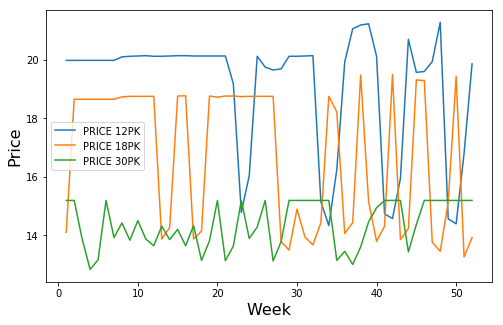

In [5]:
plt.figure(figsize=(8,5))
plt.plot(df['Week'], df['PRICE 12PK'], '-')
plt.plot(df['Week'], df['PRICE 18PK'], '-')
plt.plot(df['Week'], df['PRICE 30PK'], '-')
plt.legend(['PRICE 12PK', 'PRICE 18PK', 'PRICE 30PK'])
plt.ylabel("Price", fontsize = fs)
plt.xlabel("Week", fontsize = fs)
plt.show()

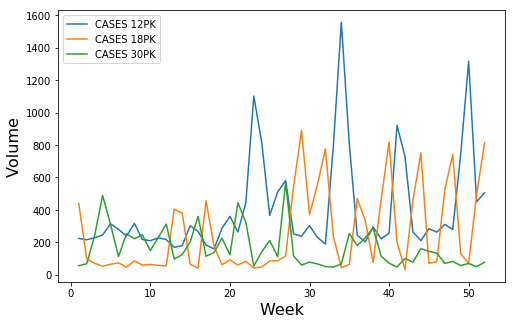

In [6]:
plt.figure(figsize=(8,5))
plt.plot(df1['Week'], df1['CASES 12PK'], '-')
plt.plot(df1['Week'], df1['CASES 18PK'], '-')
plt.plot(df1['Week'], df1['CASES 30PK'], '-')
plt.legend(['CASES 12PK', 'CASES 18PK', 'CASES 30PK'])
plt.ylabel("Volume", fontsize = fs)
plt.xlabel("Week", fontsize = fs)
plt.show()

In [7]:
#Combine the two DataFrame
combined_df = pd.merge(df, df1, on="Week")

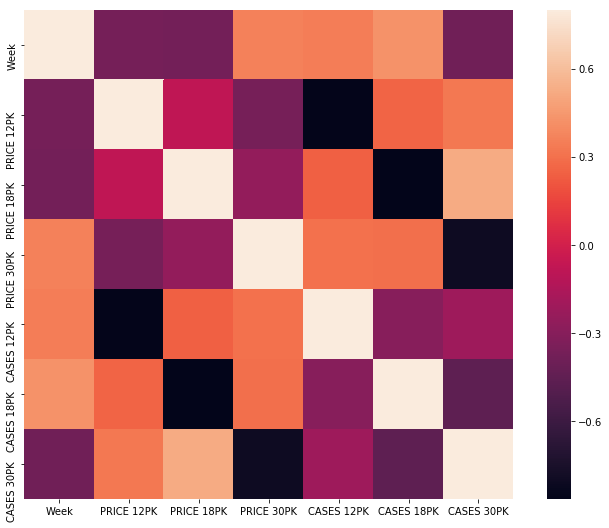

In [8]:
#Correlation Representation`
corrmat = combined_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

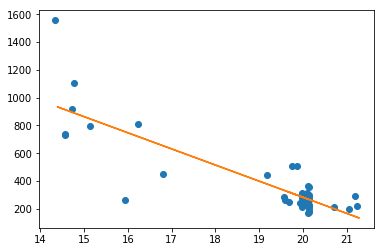

Root mean square error  154.92969553016744


In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()

#Splitting the entire dataset into testing and training set
X_train, X_test, y_train, y_test = train_test_split(combined_df['PRICE 12PK'], combined_df['CASES 12PK'], test_size=0.20)

#Training the Regression Model
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

#Predicting sales volume for the test set
y_predict = reg.predict(X_test.reshape(-1,1))
plt.ylabel("Volume", fontsize = fs)
plt.xlabel("Price", fontsize = fs)
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_predict,'-')
plt.show()
rms = sqrt(mean_squared_error(y_test.reshape(-1,1) , y_predict))
print("Root mean square error ",rms)

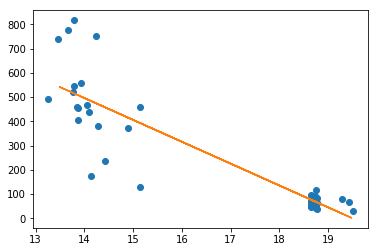

Root mean square error  169.44778850524332


In [10]:
#Splitting the entire dataset into testing and training set
X_train, X_test, y_train, y_test = train_test_split(combined_df['PRICE 18PK'], combined_df['CASES 18PK'], test_size=0.20)

#Training the Regression Model
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

#Predicting sales volume for the test set
y_predict = reg.predict(X_test.reshape(-1,1))
plt.ylabel("Volume", fontsize = fs)
plt.xlabel("Price", fontsize = fs)
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_predict,'-')
plt.show()

rms = sqrt(mean_squared_error(y_test.reshape(-1,1) , y_predict))
print("Root mean square error ",rms)

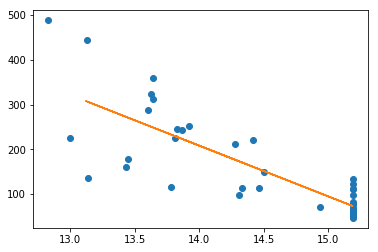

Actual value:  34    252.75
10    229.75
14    200.50
44    143.50
26    568.25
30     66.25
50     49.25
23    140.75
46     68.75
13    123.25
4     308.75
Name: CASES 30PK, dtype: float64


Predicted value:  [[305.70321873]
 [222.90388149]
 [185.47404411]
 [166.19200668]
 [307.97169372]
 [ 73.18453198]
 [ 73.18453198]
 [220.6354065 ]
 [ 73.18453198]
 [225.17235649]
 [303.43474373]]
Root mean square error  89.83577311911384


In [13]:
#Splitting the entire dataset into testing and training set
X_train, X_test, y_train, y_test = train_test_split(combined_df['PRICE 30PK'], combined_df['CASES 30PK'], test_size=0.20)

#Training the Regression Model
reg.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

#Predicting sales volume for the test set
y_predict = reg.predict(X_test.reshape(-1,1))
plt.ylabel("Volume", fontsize = fs)
plt.xlabel("Price", fontsize = fs)
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_predict,'-')
plt.show()

rms = sqrt(mean_squared_error(y_test.reshape(-1,1) , y_predict))

print("Actual value: ",y_test)
print("\n")
print("Predicted value: ",y_predict)
print("Root mean square error ",rms)